In [3]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from datetime import datetime
import plotly.express as px

#import download"

In [59]:
pd.set_option('display.max_rows',45000)

In [4]:
df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv")

In [5]:
df


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,43823,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [6]:
def convert_to_date(x):
    return datetime.strptime(x,'%Y %m %d %H')

In [7]:
aq_df = pd.read_csv("PRSA_data_2010.1.1-2014.12.31.csv",parse_dates=[['year','month','day','hour']], date_parser = convert_to_date,keep_date_col=True)

In [12]:
aq_df.isnull().sum()

year_month_day_hour       0
No                        0
year                      0
month                     0
day                       0
hour                      0
pm2.5                  2067
DEWP                      0
TEMP                      0
PRES                      0
cbwd                      0
Iws                       0
Is                        0
Ir                        0
dtype: int64

In [17]:
aq_df.query('TEMP != TEMP')

,year_month_day_hour,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir


In [18]:
aq_df[aq_df['pm2.5'].isnull()]

,year_month_day_hour,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43548,2014-12-20 12:00:00,43549,2014,12,20,12,NaN,-18,0.0,1030.0,NW,244.97,0,0
43549,2014-12-20 13:00:00,43550,2014,12,20,13,NaN,-19,1.0,1029.0,NW,249.89,0,0
43550,2014-12-20 14:00:00,43551,2014,12,20,14,NaN,-20,1.0,1029.0,NW,257.04,0,0
43551,2014-12-20 15:00:00,43552,2014,12,20,15,NaN,-20,2.0,1028.0,NW,262.85,0,0


In [25]:
fig = px.line(aq_df,x='year_month_day_hour',y='pm2.5', title='pm2.5 with slider')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1,label='1y', step='year', stepmode='backward'),
            dict(count=2,label='2y', step='year', stepmode='backward'),
            dict(count=3,label='3y', step='year', stepmode='backward'),
            dict(step='all')
            
        ])
    )
)
fig.show()

In [ ]:
aq_df = aq_df.set_index('year_month_day_hour')

In [29]:
aq_df_na = aq_df.dropna()

In [30]:
aq_df_na

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,,,,,
2010-01-02 00:00:00,25,2010,1,2,0,129.0,-16,-4.0,1020.0,SE,1.79,0,0
2010-01-02 01:00:00,26,2010,1,2,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0
2010-01-02 02:00:00,27,2010,1,2,2,159.0,-11,-5.0,1021.0,SE,3.57,0,0
2010-01-02 03:00:00,28,2010,1,2,3,181.0,-7,-5.0,1022.0,SE,5.36,1,0
2010-01-02 04:00:00,29,2010,1,2,4,138.0,-7,-5.0,1022.0,SE,6.25,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,43820,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,43821,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,43822,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0


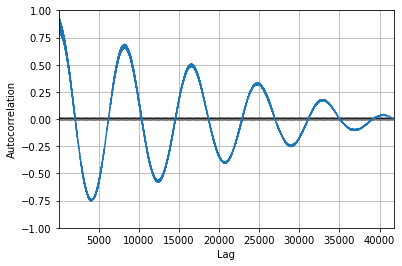

In [39]:
pd.plotting.autocorrelation_plot(aq_df_na['TEMP'])

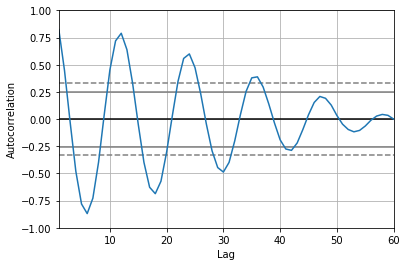

In [33]:
pd.plotting.autocorrelation_plot(aq_df_na['TEMP'].resample('1m').mean())

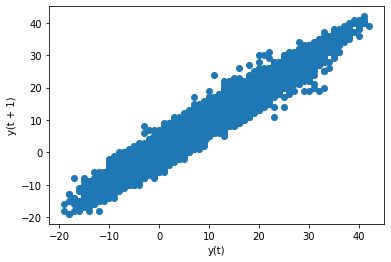

In [41]:
pd.plotting.lag_plot(aq_df_na['TEMP'],lag=1)

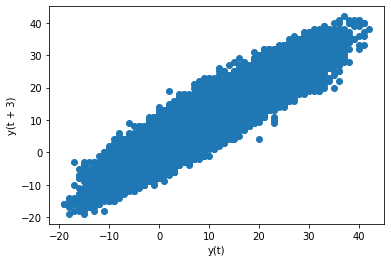

In [43]:
pd.plotting.lag_plot(aq_df_na['TEMP'],lag=3)

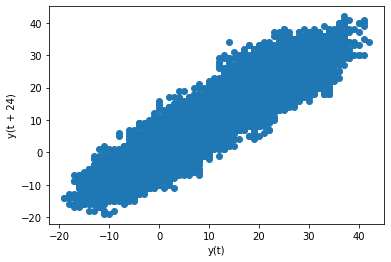

In [36]:
pd.plotting.lag_plot(aq_df_na['TEMP'],lag=24)

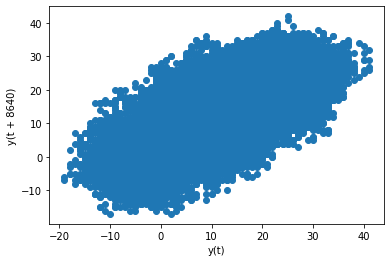

In [46]:
pd.plotting.lag_plot(aq_df_na['TEMP'],lag=8640)

In [64]:
aq_df.head(4)

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
year_month_day_hour,,,,,,,,,,,,,
2010-01-01 00:00:00,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0


In [ ]:
#aq_df_imp['TEMPFFILL'] = aq_df['TEMP'].fillna(method='ffill')
#aq_df_imp['TEMPBFILL'] = aq_df['TEMP'].fillna(method='bfill') 
#aq_df['TEMP'].rolling(window=2,min_periods=1).mean()


In [ ]:
#aq_df.loc[aq_df_imp.index + pd.offsets.DateOffset(years=-1)]['TEMP']
#aq_df_imp['TEMP_PREVY'] = aq_df_imp.apply(lambda x: aq_df.loc[x['year_month_day_hour'] - pd.Offsets.DateOffsets(years=-1)]['TEMP']  if pd.isna(x['TEMP']) else x['TEMP'],axis=1)